In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
import keras.models
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
sys.path.append("/content/drive/My Drive/EVA_assi_9")
working_path = '/content/drive/My Drive/EVA_assi_9'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from google.colab import drive
drive.mount('../content/drive/', force_remount=True)

Mounted at ../content/drive/


In [0]:
import os
os.listdir('../content/drive/My Drive/EVA_assi_9')

['saved1.hdf5']

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
print (num_classes)
print (num_train)
print (train_features.shape)

10
50000
(50000, 32, 32, 3)


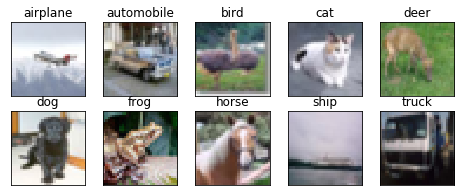

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Performing Image Normalization

In [0]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batch_X, batch_y = iterator.next()

Statistics train=120.708 (64.150), test=121.529 (64.061)


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batch_X
X_test = batch_testX

y_train=batch_y
y_test=batch_testy
                        

In [0]:
_# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Creating Architecture

In [0]:
model = Sequential()                                                            # Image size - RF #border same  - padding which maintains the size of image as same after conv as well. 

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))# 32 - 3
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(96, 3, 3,border_mode='same',use_bias=False))                           #32 - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))                                      #16 - 10



model.add(Convolution2D(48, 3, 3, border_mode='same',use_bias=False))                         #16 -12
model.add(BatchNormalization())      
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(96, 3, 3, border_mode='same',use_bias=False))                         #16 - 14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(192, 3, 3,border_mode='same',use_bias=False))                          #16 - 16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))                          #8 - 32
model.add(MaxPooling2D(pool_size=(2, 2)))

                         #8 - 28
#model.add(Dropout(0.25))

model.add(Convolution2D(48, 3, 3,use_bias=False))                        #8 - 34
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


model.add(Convolution2D(92,3,3,use_bias=False))                           #6 - 36
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(92,4,4,use_bias=False))                           #4 - 38
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Convolution2D(10, 1,use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))
# Compile the model


W0702 02:26:23.235109 140606417307520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
W0702 02:26:23.241626 140606417307520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 02:26:23.250152 140606417307520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 02:26:23.

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        41472     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
__________

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/EVA_assi_9/nocutout.h5"
model_ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=[0.8,0.9], cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)

callbacks=[LearningRateScheduler(scheduler, verbose=1), model_ckpt]
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0702 02:27:09.702731 140606417307520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



## Model 1 without Cutout

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0702 02:28:31.527298 140606417307520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is depr

Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 27s 68ms/step - loss: 1.4378 - acc: 0.4773 - val_loss: 1.3013 - val_acc: 0.5418

Epoch 00001: val_acc improved from -inf to 0.54180, saving model to /content/drive/My Drive/EVA_assi_9/nocutout.h5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 22s 56ms/step - loss: 0.9681 - acc: 0.6551 - val_loss: 0.8519 - val_acc: 0.7059

Epoch 00002: val_acc improved from 0.54180 to 0.70590, saving model to /content/drive/My Drive/EVA_assi_9/nocutout.h5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 22s 55ms/step - loss: 0.7958 - acc: 0.7211 - val_loss: 0.7524 - val_acc: 0.7371

Epoch 00003: val_acc improved from 0.70590 to 0.73710, saving model to /content/drive/My Drive/EVA_assi_9/nocutout.h5
Epoch 4/100

Epoch 0000

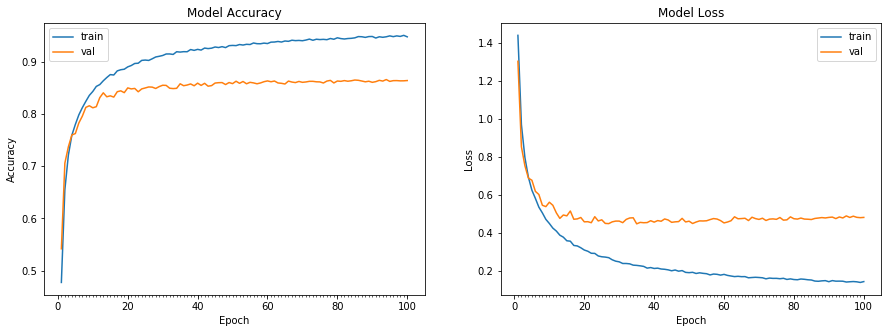

Accuracy on test data is: 86.42


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model))

In [0]:
model=keras.models.load_model('/content/drive/My Drive/EVA_assi_9/nocutout.h5')


In [0]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print (score[1])

10000/10000 [==============================] - 1s 134us/step
0.8661


# Model with  cutout Implementation

In [0]:
model1 = Sequential()                                                            # Image size - RF #border same  - padding which maintains the size of image as same after conv as well. 

model1.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))# 32 - 3
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Convolution2D(96, 3, 3,border_mode='same',use_bias=False))                           #32 - 5
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))
model1.add(MaxPooling2D(pool_size=(2, 2)))                                      #16 - 10



model1.add(Convolution2D(48, 3, 3, border_mode='same',use_bias=False))                         #16 -12
model1.add(BatchNormalization())      
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Convolution2D(96, 3, 3, border_mode='same',use_bias=False))                         #16 - 14
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Convolution2D(192, 3, 3,border_mode='same',use_bias=False))                          #16 - 16
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Convolution2D(48, 1, 1, activation='relu',use_bias=False))                          #8 - 32
model1.add(MaxPooling2D(pool_size=(2, 2)))

                         #8 - 28
#model.add(Dropout(0.25))

model1.add(Convolution2D(48, 3, 3,use_bias=False))                        #8 - 34
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Convolution2D(92,3,3,use_bias=False))                           #6 - 36
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Convolution2D(92,4,4,use_bias=False))                           #4 - 38
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Convolution2D(10, 1,use_bias=False))
model1.add(Flatten())
model1.add(Activation('softmax'))
# Compile the model




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), use_bias=False, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), activation="relu", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), use_bias=False, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), use_bias=False, padding="same")`


In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 96)        41472     
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 96)        0         
__________

In [0]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.models import Model, Sequential
from keras.callbacks import ModelCheckpoint

filepath="/content/drive/My Drive/EVA_assi_9/cutoutw.h5"
model_ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#lr_reducer = ReduceLROnPlateau(monitor='val_acc',factor=[0.8,0.9], cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)

callbacks=[LearningRateScheduler(scheduler, verbose=1), model_ckpt]
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#lr_reducer1 = ReduceLROnPlateau(monitor='val_acc',factor=0.8, cooldown=0, patience=5, min_lr=0.5e-9,verbose = 1)





In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
390/390 [==============================] - 25s 63ms/step - loss: 1.5379 - acc: 0.4394 - val_loss: 1.3284 - val_acc: 0.5290

Epoch 00001: val_acc improved from -inf to 0.52900, saving model to /content/drive/My Drive/EVA_assi_9/cutoutw.h5
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
390/390 [==============================] - 22s 56ms/step - loss: 1.1072 - acc: 0.6042 - val_loss: 0.9803 - val_acc: 0.6539

Epoch 00002: val_acc improved from 0.52900 to 0.65390, saving model to /content/drive/My Drive/EVA_assi_9/cutoutw.h5
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
390/390 [==============================] - 22s 56ms/step - loss: 0.9269 - acc: 0.6695 - val_loss: 0.8470 - val_acc: 0.6984

Epoch 00003: val_acc improved from 0.65390 to 0.69840, saving model to /content/drive/My Drive/EVA_assi_9/cutoutw.h5
Epoch 4/100

Epoch 00004: 

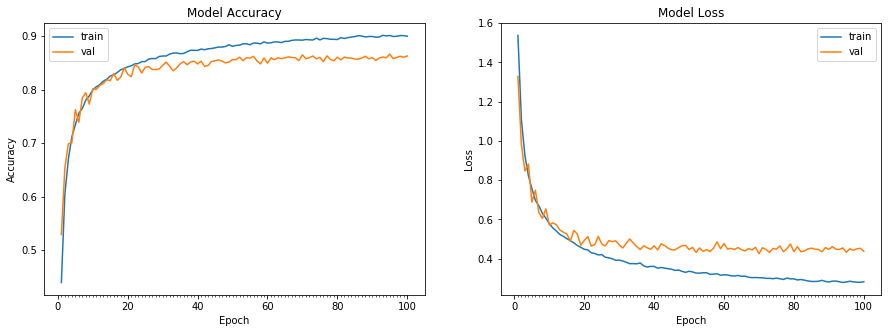

Accuracy on test data is: 86.28


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks=callbacks)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

In [0]:
model2=keras.models.load_model('/content/drive/My Drive/EVA_assi_9/cutoutw.h5')


W0702 10:41:57.473280 139804321085312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 10:41:57.618156 139804321085312 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
score = model2.evaluate(X_test, Y_test, batch_size=128)
print (score[1])

10000/10000 [==============================] - 2s 159us/step
0.8662


# Note - With Cutout Implementation acc - 0.8662 , Without cutout implementation - 0.8661  

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

(32, 32, 3) (32, 32, 3)


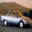

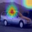

(32, 32, 3) (32, 32, 3)


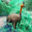

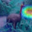

(32, 32, 3) (32, 32, 3)


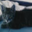

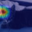

(32, 32, 3) (32, 32, 3)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


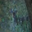

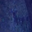

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=True))
idx=[4,6,9,10]
selected_image=[train_features[i] for i,_ in enumerate(train_features) if i in idx ]
for img in selected_image:
  #print(img.shape)
  #x = image.img_to_array(img)
  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  #print(x.shape)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model1.output[:, class_idx]
  last_conv_layer = model1.get_layer("conv2d_20")
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(10):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  print(img.shape,heatmap.shape)
  #immg = img.astype('float32')*255
  #img2=np.uint8(255*img)
  superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0,dtype=cv2.CV_32F)
  #plt.imshow(img)
  #plt.imshow(superimposed_img)
  cv2_imshow(img)
  cv2_imshow(superimposed_img)
  cv2.waitKey(0)

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

-1

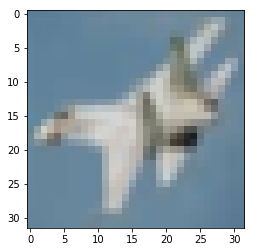

In [0]:
x = test_features[10]
x = np.expand_dims(x, axis=0)
preds = model1.predict(x,batch_size=1)
class_idx = np.argmax(preds[0])
class_output = model1.output[:, class_idx]
last_conv_layer = model1.get_layer("conv2d_20")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(20):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = (test_features[10])
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
img2=np.uint8(255*img)
superimposed_img = cv2.addWeighted(img2, 0.6, heatmap, 0.4, 0)
#cv2_imshow(img)
#cv2_imshow(superimposed_img)
plt.imshow(img)
#plt.imshow(superimposed_img)
cv2.waitKey(0)

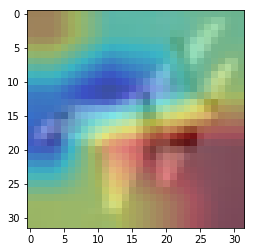

In [0]:
plt.imshow(superimposed_img)

In [0]:
# import cv2
# from google.colab.patches import cv2_imshow

# images = [100,101,201,510,600,1000,1600,1601,3000,4000,5500,7000,7500,8000,9000,9999]
# for j in images:
#   x = testX[j]
#   x = np.expand_dims(x, axis=0)
#   preds = model.predict(x,batch_size=1)
#   class_idx = np.argmax(preds[0])
#   class_output = model.output[:, class_idx]
#   last_conv_layer = model.get_layer("conv2d_26")

#   grads = K.gradients(class_output, last_conv_layer.output)[0]
#   pooled_grads = K.mean(grads, axis=(0, 1, 2))
#   iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
#   pooled_grads_value, conv_layer_output_value = iterate([x])
#   for i in range(256):
#     conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  
#   heatmap = np.mean(conv_layer_output_value, axis=-1)
#   heatmap = np.maximum(heatmap, 0)
#   heatmap /= np.max(heatmap) 
#   img = (testX[j])
#   heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
#   heatmap = np.uint8(255 * heatmap)
#   heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
#   superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
#   #cv2_imshow(img)
#   #cv2_imshow(superimposed_img)
#   concatimg = cv2.hconcat([img,superimposed_img])
#   # Display the concatenated image
#   print (j)
#   cv2_imshow(concatimg)
#   cv2.waitKey(0)
#   print (" ")
#   j = j + 1
